In [1]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Available GPUs:", tf.config.list_physical_devices('GPU'))


TensorFlow Version: 2.10.1
Available GPUs: []


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("airbnb.csv")

# Basic info
print(df.info())
print(df.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

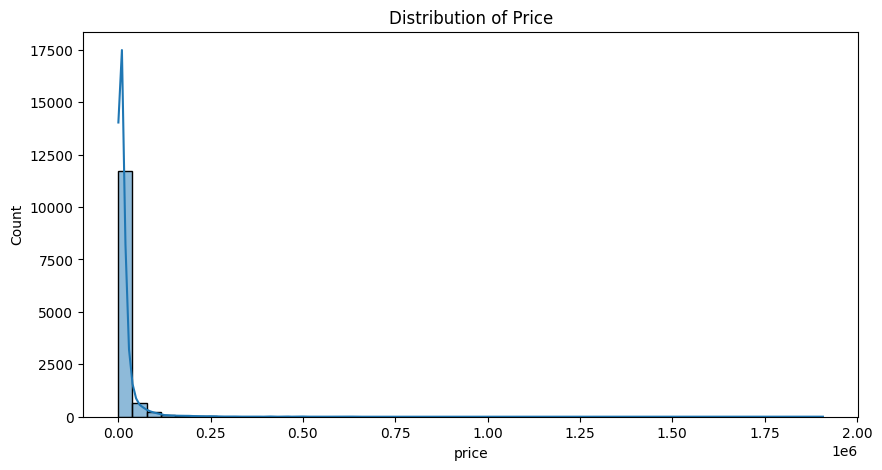

In [3]:
# Fix numeric conversion
df['rating'] = pd.to_numeric(df['rating'].replace('New', np.nan), errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Distribution of price
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.show()



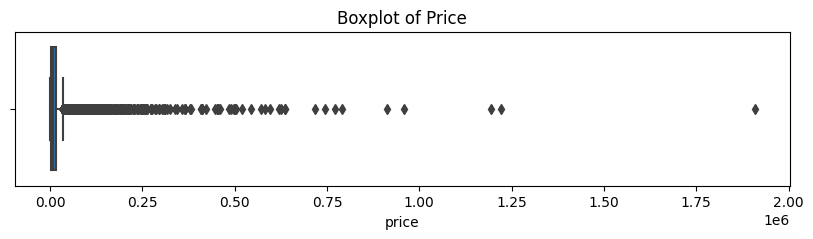

In [4]:
# Boxplot of price
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()



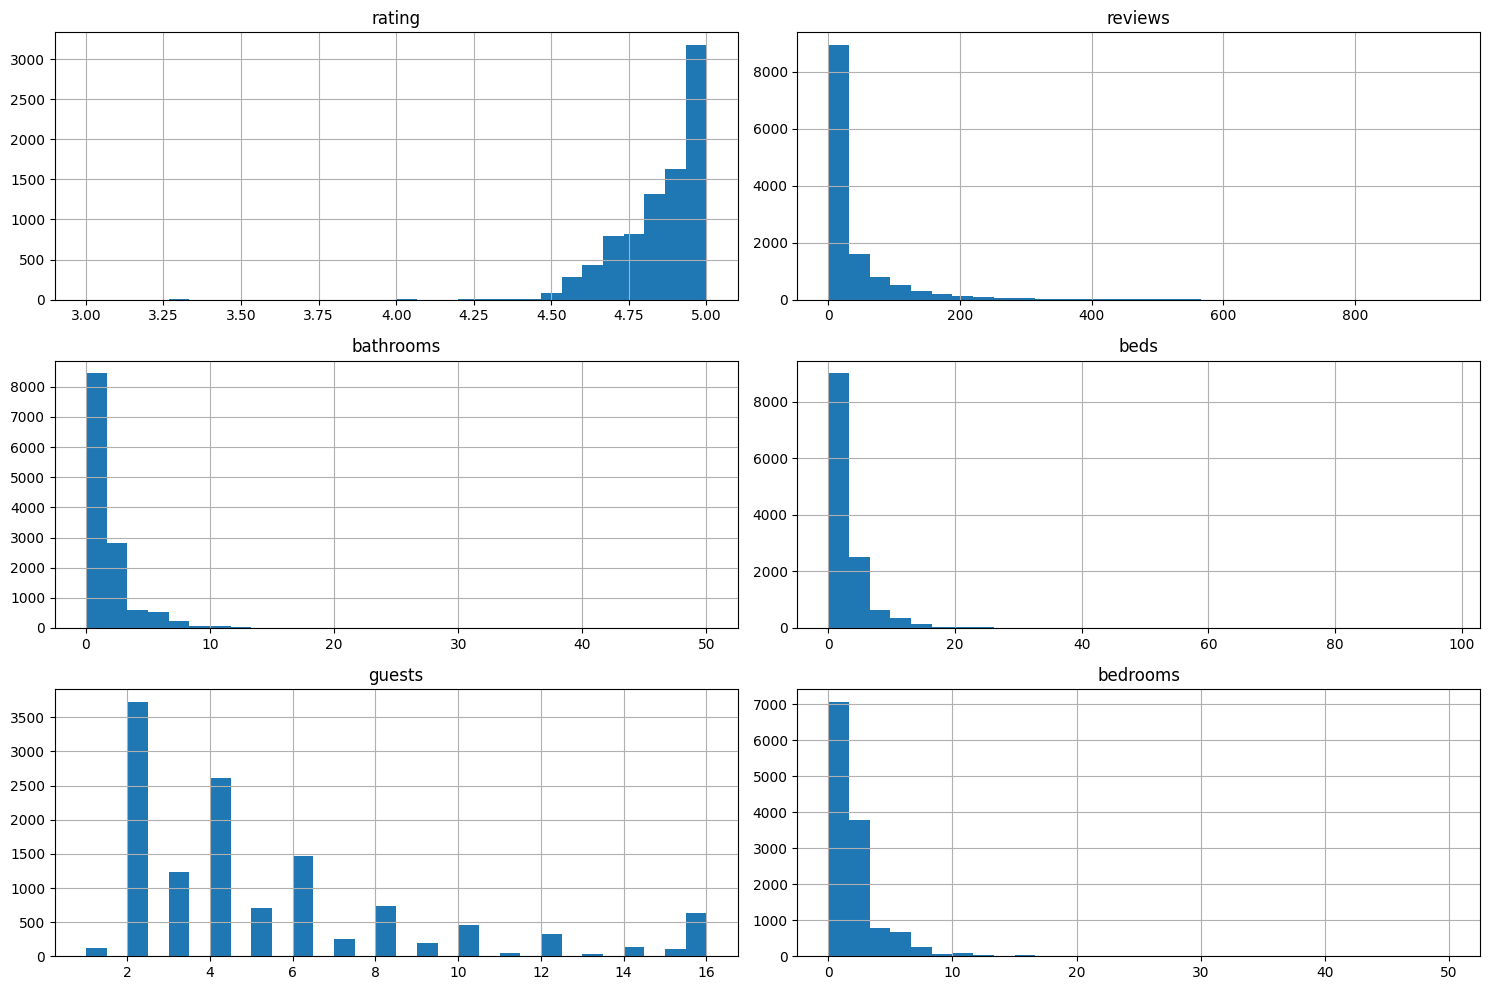

In [5]:
# Histograms of numerical features
num_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'bedrooms']
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()



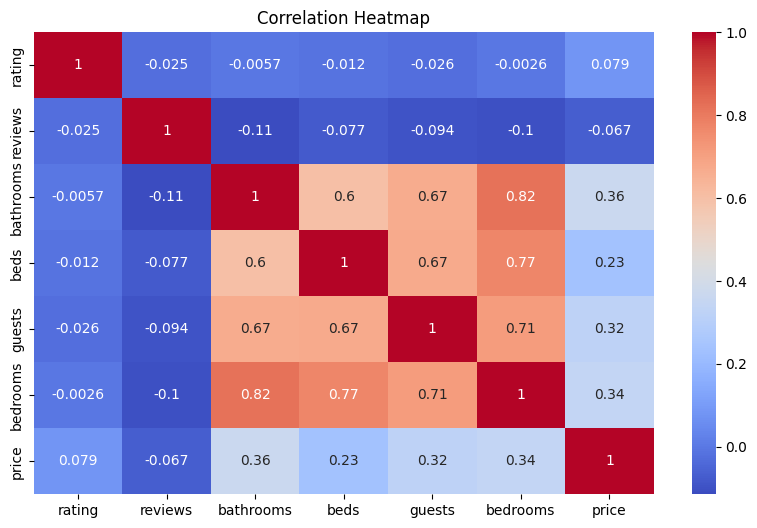

In [6]:
# Correlation matrix
corr = df[num_cols + ['price']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

# Drop rows with missing checkin/checkout
df_cleaned = df.dropna(subset=['checkin', 'checkout'])

# Fill missing values
df_cleaned['rating'].fillna(df_cleaned['rating'].median(), inplace=True)
df_cleaned['reviews'].fillna(df_cleaned['reviews'].median(), inplace=True)
df_cleaned['host_name'].fillna("Unknown", inplace=True)

# Remove price outliers above 99 percentile
df_cleaned = df_cleaned[df_cleaned['price'] <= df_cleaned['price'].quantile(0.99)]

# One-hot encoding for country
df_encoded = pd.get_dummies(df_cleaned, columns=['country'], drop_first=True)

# Drop unused columns
df_encoded.drop(columns=[
    'Unnamed: 0', 'id', 'name', 'host_name', 'host_id', 'address', 'features',
    'amenities', 'safety_rules', 'hourse_rules', 'img_links', 'checkin', 'checkout'
], inplace=True)

# Scale features
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Wasif\AppData\Local\Temp\ipykernel_19768\3988754058.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rating'].fillna(df_cleaned['rating'].median(), inplace=True)
C:\Users\Wasif\AppData\Local\Temp\ipykernel_19768\3988754058.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviews'].fillna(df_cleaned['reviews'].median(), inplace=True)
C:\Users\Wasif\AppData\Local\Temp\ipykernel_19768\3988754058.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
202/202 [==============================] - 1s 2ms/step - loss: 577371776.0000 - mae: 13813.5986 - val_loss: 261537328.0000 - val_mae: 8152.5723
Epoch 2/100
202/202 [==============================] - 0s 1ms/step - loss: 273223264.0000 - mae: 9012.7881 - val_loss: 204641312.0000 - val_mae: 8098.5874
Epoch 3/100
202/202 [==============================] - 0s 1ms/step - loss: 248690944.0000 - mae: 8678.4561 - val_loss: 200842400.0000 - val_mae: 7875.3311
Epoch 4/100
202/202 [==============================] - 0s 1ms/step - loss: 241405936.0000 - mae: 8499.2969 - val_loss: 201916672.0000 - val_mae: 7962.2559
Epoch 5/100
202/202 [==============================] - 0s 1ms/step - loss: 237243728.0000 - mae: 8432.8545 - val_loss: 199499936.0000 - val_mae: 7827.7261
Epoch 6/100
202/202 [==============================] - 0s 1ms/step - loss: 233205440.0000 - mae: 8399.5498 - val_loss: 194722336.0000 - val_mae: 7613.6392
Epoch 7/100
202/202 [==============================] - 0s 1ms/step - 

64/64 [==============================] - 0s 675us/step
MSE: 6726684385.928275
MAE: 11938.794606753421
R²: -18.388503831353983


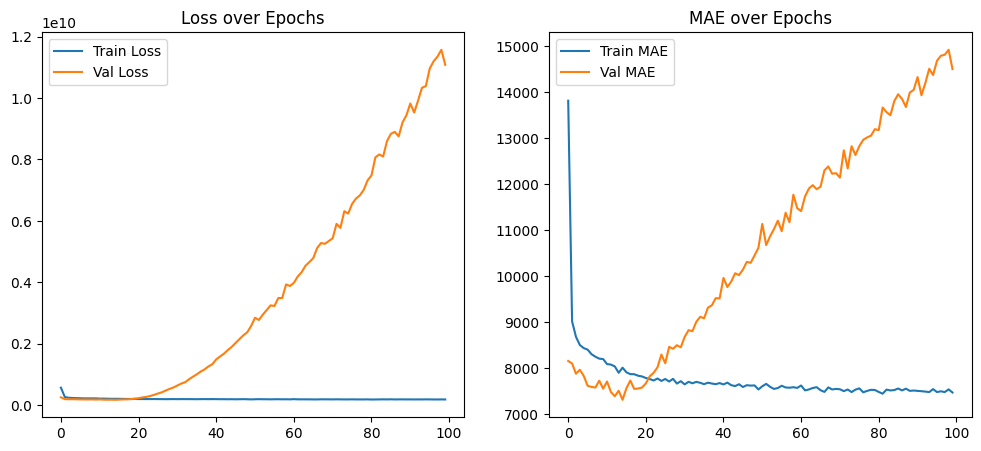

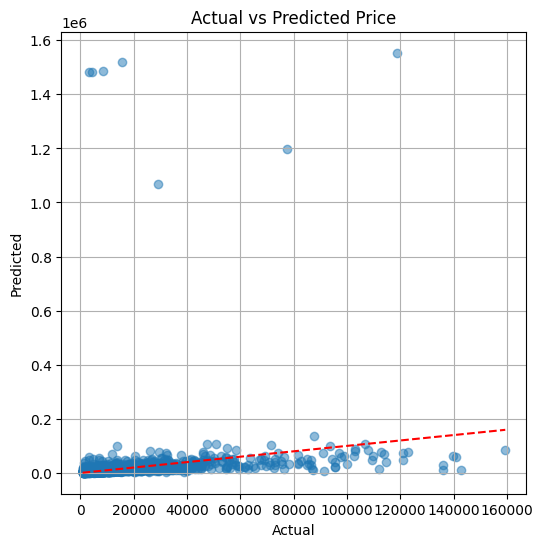

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(X_test).flatten()

# Evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Loss & MAE plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("MAE over Epochs")
plt.legend()
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()
